# Book Recommendation System

## Importing Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading CSV files

In [3]:
books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_19912\378180666.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


## Taking Overview of data, Analysis and visualization

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [30]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [32]:
# We don't have to deal with other column null values but image column matter, as we will retrieve images
# so we will replace the null values with the images that are medium
books['Image-URL-L'] = books.apply(lambda row: row['Image-URL-M'] if pd.isnull(row['Image-URL-L']) else row['Image-URL-L'], axis=1)

In [33]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## Ploting to have a clear understanding
### only one column matters alot that is Book-Rating

<Axes: >

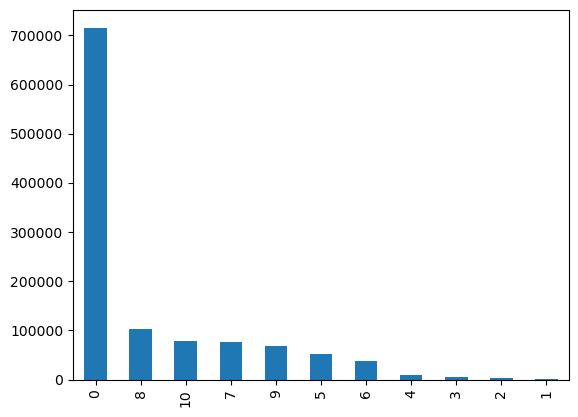

In [9]:
ratings['Book-Rating'].value_counts().plot(kind='bar')

In [10]:
#We can clearly see alot of books has 0 ratings

In [40]:
df = ratings[ratings['Book-Rating']>0]

<Axes: >

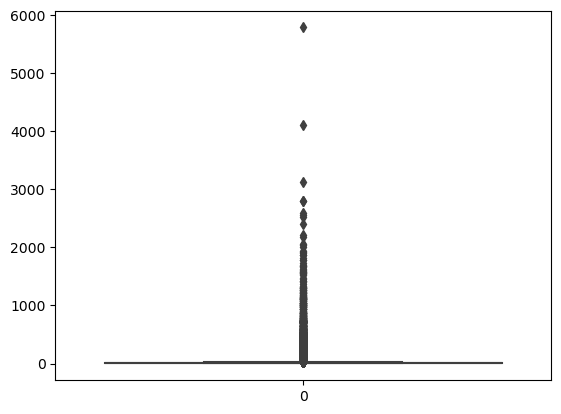

In [41]:
series = df.groupby('ISBN').sum()['Book-Rating']
sns.boxplot(series)

In [42]:
#There are some outliers in this
#Only one book has rating over 5000 and one has 4000 others has rating between 1000 and 3000
series.shape

(185973,)

In [34]:
#But the outliers are in very negligible numbers
#From 185973 books there are only 2 outliers so it doesn't matter

<Axes: >

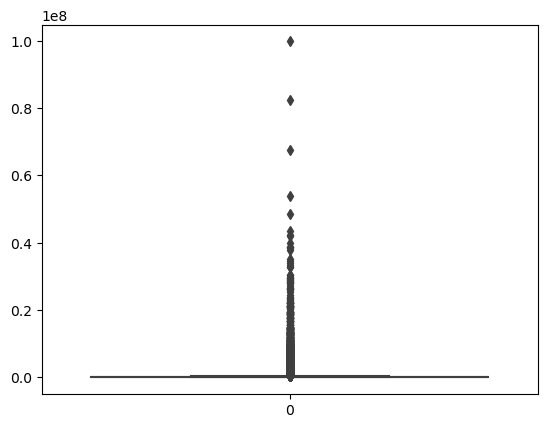

In [43]:
# How many number of users rated a book
series = df.groupby('ISBN').sum()['User-ID']
sns.boxplot(series)

In [45]:
# The outliers also exist in this on based of how many users rated a book
# but some of the books are older and most famous like harry potter

In [48]:
ratings['Book-Rating'].max()

10

In [49]:
# Average Rating
ratings['Book-Rating'].mean()

2.8669501991685364

In [50]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [51]:
# ratings has 0 null values

In [52]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [53]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [54]:
# The column age has null values but we don't use it in our program so it's ok

# Popularity Based Recommendation System

### We have to extract the most popular books
### But what if a book has only 1 rating that is 10 that will not be count
### So We have to set a criteria that books should have ratings more than 200

In [55]:
# We have to merge books and ratings dataframe
ratings_and_books = books.merge(ratings, on='ISBN')
ratings_and_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0
...,...,...,...,...,...,...,...,...,...,...
1031131,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463,7
1031132,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579,4
1031133,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680,0
1031134,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680,0


In [56]:
# We have to calculate average rating and number of rating on every book
# We have same book-titles with different ISBN no so we make a groupby Book-Title
group = ratings_and_books.groupby('Book-Title')

In [57]:
rating_count = group.count()['Book-Rating'].reset_index()
rating_count.rename(columns={'Book-Rating': 'Num-Rating'}, inplace=True)
rating_count

,Book-Title,Num-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [58]:
rating_average = group.mean()['Book-Rating'].reset_index()
rating_average.rename(columns={'Book-Rating': 'Avg-Rating'}, inplace=True)
rating_average

C:\Users\HP\AppData\Local\Temp\ipykernel_19912\4199840876.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rating_average = group.mean()['Book-Rating'].reset_index()


,Book-Title,Avg-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


<Axes: >

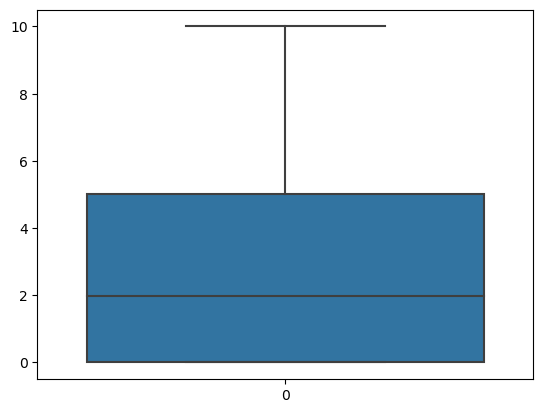

In [62]:
sns.boxplot(rating_average['Avg-Rating'])

In [60]:
# Average Rating has median around two and Interquartile range between 0 and 5

In [64]:
# Now we have to merge both num_rating and average_rating to make them one dataframe
all_ratings = rating_count.merge(rating_average, on='Book-Title')
all_ratings

,Book-Title,Num-Rating,Avg-Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [66]:
# We take top 20 books on basis of average rating and should have number of ratings more than 200
mask = all_ratings['Num-Rating'] > 200
final_ds = all_ratings[mask].sort_values(by='Avg-Rating', ascending=False).head(20)

In [67]:
# Now finally merging it with original books dataset
final_ds = final_ds.merge(books, on='Book-Title')
final_ds

,Book-Title,Num-Rating,Avg-Rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
1,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136369,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...
2,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0786222743,J. K. Rowling,2000,Thorndike Press,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
4,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139600,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...
...,...,...,...,...,...,...,...,...,...,...
89,Neverwhere,265,4.449057,0380789019,Neil Gaiman,1998,Avon,http://images.amazon.com/images/P/0380789019.0...,http://images.amazon.com/images/P/0380789019.0...,http://images.amazon.com/images/P/0380789019.0...
90,Neverwhere,265,4.449057,0380973634,Neil Gaiman,1997,William Morrow,http://images.amazon.com/images/P/0380973634.0...,http://images.amazon.com/images/P/0380973634.0...,http://images.amazon.com/images/P/0380973634.0...
91,Neverwhere,265,4.449057,2277260029,Neil Gaiman,1998,J'ai lu,http://images.amazon.com/images/P/2277260029.0...,http://images.amazon.com/images/P/2277260029.0...,http://images.amazon.com/images/P/2277260029.0...
92,Neverwhere,265,4.449057,2290303348,Neil Gaiman,2001,J'ai lu,http://images.amazon.com/images/P/2290303348.0...,http://images.amazon.com/images/P/2290303348.0...,http://images.amazon.com/images/P/2290303348.0...


In [69]:
# But as we know it has duplicate values in Book-Title so we have to drop it
final_ds.drop_duplicates('Book-Title', inplace=True)
final_ds.shape

(20, 10)

# Collaborative Filtering Recommendation

### We will recommend the books on their favorite read
### User will give input the name of the book, and it will show 5 books related to them
### But we will consider only those books which has ratings more than 50 and we will consider the users which has rated more than 200 books

In [72]:
rating_group = ratings_and_books.groupby('User-ID')
rating_group.count()['Book-Rating']
# Indices are users and values are Book-Rating

User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 92106, dtype: int64

In [73]:
# Filtering users
r_count = rating_group.count()['Book-Rating']
filtered_users = r_count[r_count >200].index
filtered_users

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [75]:
filtered_ds = ratings_and_books[ratings_and_books['User-ID'].isin(filtered_users)]
filtered_ds

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054,0
10,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,177458,0
21,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,110912,10
...,...,...,...,...,...,...,...,...,...,...
1031124,0231128444,Slow Food(The Case For Taste),Carlo Petrini,2003,Columbia University Press,http://images.amazon.com/images/P/0231128444.0...,http://images.amazon.com/images/P/0231128444.0...,http://images.amazon.com/images/P/0231128444.0...,275970,0
1031125,0520242335,Strong Democracy : Participatory Politics for ...,Benjamin R. Barber,2004,University of California Press,http://images.amazon.com/images/P/0520242335.0...,http://images.amazon.com/images/P/0520242335.0...,http://images.amazon.com/images/P/0520242335.0...,275970,0
1031126,0762412119,"Burpee Gardening Cyclopedia: A Concise, Up to ...",Allan Armitage,2002,Running Press Book Publishers,http://images.amazon.com/images/P/0762412119.0...,http://images.amazon.com/images/P/0762412119.0...,http://images.amazon.com/images/P/0762412119.0...,275970,0
1031127,1582380805,Tropical Rainforests: 230 Species in Full Colo...,"Allen M., Ph.D. Young",2001,Golden Guides from St. Martin's Press,http://images.amazon.com/images/P/1582380805.0...,http://images.amazon.com/images/P/1582380805.0...,http://images.amazon.com/images/P/1582380805.0...,275970,0


In [76]:
# filtering on basis of rating count, it should be greater than 50
b = filtered_ratings.groupby('Book-Title').count()['Book-Rating'] >= 50
filtered_books = b[b].index
filtered_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [77]:
final_books = filtered_ratings[filtered_ratings['Book-Title'].isin(filtered_books)]
final_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9
33,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,36836,0
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398,9
38,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113270,0
39,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113519,0
...,...,...,...,...,...,...,...,...,...,...
1028414,1878702831,Echoes,Nancy Morse,1992,Meteor Publishing Corporation,http://images.amazon.com/images/P/1878702831.0...,http://images.amazon.com/images/P/1878702831.0...,http://images.amazon.com/images/P/1878702831.0...,238781,0
1028600,0394429869,I Know Why the Caged Bird Sings,Maya Angelou,1996,Random House,http://images.amazon.com/images/P/0394429869.0...,http://images.amazon.com/images/P/0394429869.0...,http://images.amazon.com/images/P/0394429869.0...,239594,8
1028602,0449001164,The Promise,CHAIM POTOK,1997,Ballantine Books,http://images.amazon.com/images/P/0449001164.0...,http://images.amazon.com/images/P/0449001164.0...,http://images.amazon.com/images/P/0449001164.0...,239594,7
1028815,0743527631,The Pillars of the Earth,Ken Follett,2002,Encore,http://images.amazon.com/images/P/0743527631.0...,http://images.amazon.com/images/P/0743527631.0...,http://images.amazon.com/images/P/0743527631.0...,240144,0


In [78]:
pt = final_books.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')

In [79]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [80]:
# There are many null values because many users haven't rated many books so the null values will be placed there
# We can say if the user hasn't rated any book so 0 can be counted for that
pt.fillna(0, inplace=True)
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
# Now we have to calculate similarity between the books for that we use cosine_similarity of sklearn
from sklearn.metrics.pairwise import cosine_similarity

In [82]:
similarity_scores = cosine_similarity(pt)

In [84]:
# We have to insert rating_count and rating average to books dataset, we already have this data set
all_ratings

,Book-Title,Num-Rating,Avg-Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [86]:
books_ds = all_ratings.merge(books, on='Book-Title')

In [87]:
books_ds

,Book-Title,Num-Rating,Avg-Rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000,0590567330,Karen Hesse,1999,Hyperion Books for Children,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...
1,Always Have Popsicles,1,0.000000,0964147726,Rebecca Harvin,1994,Rebecca L. Harvin,http://images.amazon.com/images/P/0964147726.0...,http://images.amazon.com/images/P/0964147726.0...,http://images.amazon.com/images/P/0964147726.0...
2,Apple Magic (The Collector's series),1,0.000000,0942320093,Martina Boudreau,1984,Amer Cooking Guild,http://images.amazon.com/images/P/0942320093.0...,http://images.amazon.com/images/P/0942320093.0...,http://images.amazon.com/images/P/0942320093.0...
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000,0310232546,Nancy N. Rue,2001,Zonderkidz,http://images.amazon.com/images/P/0310232546.0...,http://images.amazon.com/images/P/0310232546.0...,http://images.amazon.com/images/P/0310232546.0...
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000,0962295701,Lou Mobley,1989,"Teleonet, Incorporated",http://images.amazon.com/images/P/0962295701.0...,http://images.amazon.com/images/P/0962295701.0...,http://images.amazon.com/images/P/0962295701.0...
...,...,...,...,...,...,...,...,...,...,...
270291,Ã?Â?lpiraten.,2,0.000000,3499232499,Janwillem van de Wetering,2002,Rowohlt Tb.,http://images.amazon.com/images/P/3499232499.0...,http://images.amazon.com/images/P/3499232499.0...,http://images.amazon.com/images/P/3499232499.0...
270292,Ã?Â?rger mit Produkt X. Roman.,4,5.250000,325721538X,Joan Aiken,1987,Diogenes Verlag,http://images.amazon.com/images/P/325721538X.0...,http://images.amazon.com/images/P/325721538X.0...,http://images.amazon.com/images/P/325721538X.0...
270293,Ã?Â?sterlich leben.,1,7.000000,3451274973,Anselm GrÃ?Â¼n,2001,"Herder, Freiburg",http://images.amazon.com/images/P/3451274973.0...,http://images.amazon.com/images/P/3451274973.0...,http://images.amazon.com/images/P/3451274973.0...
270294,Ã?Â?stlich der Berge.,3,2.666667,3442725739,David Guterson,2000,btb,http://images.amazon.com/images/P/3442725739.0...,http://images.amazon.com/images/P/3442725739.0...,http://images.amazon.com/images/P/3442725739.0...


In [88]:
# Recommend method which takes the book name as parameter and return 5 similar books
def recommend(book):
    index = np.where(pt.index==book)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x:x[1], reverse=True)[1:6]
    
    data = []
    for x, y in similar_items:
        item = []
        temp = books_ds[books_ds['Book-Title'] == pt.index[x]]
        temp = temp.drop_duplicates('Book-Title')
        item.extend(temp['Book-Author'].values)
        item.extend(temp['Image-URL-L'].values)
        item.extend(temp['Num-Rating'].values)
        item.extend(temp['Avg-Rating'].values)
        
        data.append(item)
        
    print(data)
    return [pt.index[x] for x,y in similar_items]

In [89]:
recommend('1984')

[['George Orwell', 'http://images.amazon.com/images/P/0451526341.01.LZZZZZZZ.jpg', 233, 4.274678111587983], ['Margaret Atwood', 'http://images.amazon.com/images/P/0449212602.01.LZZZZZZZ.jpg', 311, 3.3987138263665595], ['Aldous Huxley', 'http://images.amazon.com/images/P/0060809833.01.LZZZZZZZ.jpg', 226, 4.331858407079646], ['ANNE RICE', 'http://images.amazon.com/images/P/0345313860.01.LZZZZZZZ.jpg', 301, 3.777408637873754], ['Michael Cunningham', 'http://images.amazon.com/images/P/0312243022.01.LZZZZZZZ.jpg', 216, 3.4444444444444446]]


['Animal Farm',
 "The Handmaid's Tale",
 'Brave New World',
 'The Vampire Lestat (Vampire Chronicles, Book II)',
 'The Hours : A Novel']

In [90]:
import pickle

In [91]:
pickle.dump(books_ds, open('books_ds.pkl', 'wb'))
pickle.dump(similarity_scores, open('similarity_scores.pkl', 'wb'))
pickle.dump(pt, open('pt.pkl', 'wb'))